In [1]:

# !pip install gensim
# !pip install python-Levenshtein



import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
from tqdm import tqdm
import re
import collections
# from wordcloud import STOPWORDS
# from scipy.sparse import csr_matrix
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
# import string
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from wordcloud import WordCloud
import gensim
import time
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import multiprocessing
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression



# Run the next cell only if you want to train the model. 
# If already trained, Skip to the next cell and directly load the model.

In [2]:
train_data = pd.read_csv("preprocessed_tokenized_training_data.csv")
train_data['concatenated_description'] = train_data['concatenated_description'].map(str)
train_data_idf = train_data.copy()

In [3]:
train_data

In [4]:
train_data['concatenated_description'] = train_data['concatenated_description'].apply(gensim.utils.simple_preprocess)

In [5]:
cores = multiprocessing.cpu_count()

# Build the Word2Vec model
# Continous bag of words
# Train the Word2Vec model

model2 = Word2Vec(vector_size=200, window=5, min_count=1, sg=0, workers=cores-1)
model2.build_vocab(train_data['concatenated_description'], progress_per=1000)
t = time.time()
model2.train(train_data['concatenated_description'], total_examples=model2.corpus_count, epochs=20)
print('Time to build vocab for Model-2: {} mins'.format(round((time.time() - t) / 60, 2)))


In [6]:
model2.save("word2vec_cbow_model")

# One can directly load the model from here instead of training the models again.

In [7]:
#Loading a pretrained model

model2 = Word2Vec.load("word2vec_cbow_model")


In [8]:
def avg_word2vec2(doc):
    return np.mean([model2.wv[word] for word in doc if word in model2.wv.index_to_key], axis=0)

In [9]:
train_data_model2 = train_data.copy()

series = train_data_model2.concatenated_description.apply(avg_word2vec2)

df = pd.DataFrame(series.apply(pd.Series))

train_data_model2 = pd.concat([train_data_model2, df], axis=1)

train_data_model2 = train_data_model2.drop(['concatenated_description'],axis=1)

In [10]:
train_data_model2.to_csv('avgword2vec_cbow.csv')

In [11]:
train_data_model2 = pd.read_csv('avgword2vec_cbow.csv')

In [13]:
train_data_model2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'train_id'], inplace=True)

In [10]:
train_data_model2

,item_condition_id,price,shipping,0,1,2,3,4,5,6,...,190,191,192,193,194,195,196,197,198,199
0,2,8.0,1,-0.100559,-0.614330,0.208602,0.571966,-0.131203,0.016526,0.608419,...,-0.075749,0.193744,0.494159,-0.073508,0.494414,-0.169989,0.131777,0.145828,0.024475,-0.127633
1,3,14.0,0,-0.329170,-0.350506,0.272558,0.105843,1.208020,1.528792,-0.091454,...,-1.339325,0.835479,0.271060,0.437964,1.127263,1.099126,-0.569234,-0.982572,-0.126194,-0.116404
2,1,25.0,1,-0.240003,-0.041858,0.145329,0.452647,0.760089,0.097341,0.452785,...,0.418078,0.219362,0.174552,-0.024960,-0.002166,0.013162,-0.374551,-0.620355,0.631266,-0.212377
3,3,25.0,0,-0.101531,-0.345377,-0.117154,-0.361317,-0.764579,0.917608,0.777097,...,-0.010613,0.054686,0.057820,1.474908,0.728149,1.006546,-0.213868,0.185430,-0.457993,-0.727977
4,1,12.0,1,0.820777,-0.600387,-0.174789,-0.790316,0.611780,0.271854,0.250769,...,-0.093859,0.078621,-0.048399,-0.540433,0.852686,0.234550,-0.283534,-0.156189,0.549295,-0.314060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370407,1,20.0,1,0.484753,0.030433,-0.842793,-0.549632,0.861718,1.395888,1.131525,...,-0.391027,0.211749,-0.072331,1.241811,2.145595,1.513619,1.109203,-1.061759,0.059616,-1.878718
370408,1,44.0,0,-0.989117,-0.492069,-0.002195,0.631189,1.291212,-0.071031,0.779076,...,0.386589,0.272975,-0.883474,-0.305047,-1.207003,0.288548,-1.372537,-0.139790,1.139007,0.010722
370409,3,15.0,1,0.183705,0.060849,0.345536,0.088263,0.149190,0.014507,0.373666,...,-0.325529,0.767687,0.523542,0.516035,0.218952,0.475278,-0.767223,0.097173,-0.474679,-0.750847
370410,1,16.0,0,-0.263113,-0.582247,0.410359,-0.201431,0.439368,1.350481,0.880811,...,-0.339725,0.607348,-0.159939,0.906151,1.756508,0.985768,0.587361,-0.796640,-0.361518,-1.248246


## "avgword2vec_sg.csv" --> Will be used for "train_test_split", Contains 0.03 of entire dataset. 
## Generated from extracting dataset "preprocessed_tokenized_training_data.csv" and then applying "word2vec_cbow_model" on it.

# We've our dataset ready for the Model-2.

In [11]:
data = train_data_model2.copy()

In [12]:
from sklearn.model_selection import train_test_split

y = data['price']
X = data.drop(columns=['price'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4)

In [9]:
# X_train = X_train[:10000]
# y_train = y_train[:10000]

# Trying few models:
    - Naive Mean
    - Random Mean
    - Linear Regression

In [14]:
result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

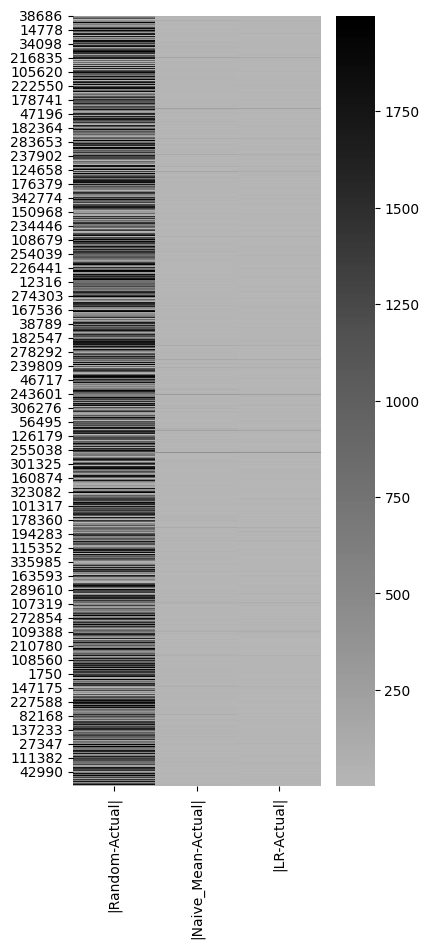

In [15]:
# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

#Method: LR
lr = LinearRegression()
lr.fit(X_train, y_train)
result_df.LR =lr.predict(X_test)


result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)
result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(4,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [16]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,Random,Naive_Mean,LR
ME,-975.645926,-0.073512,-0.049521
RMSE,1133.910258,37.582783,33.89408
MAE,976.591618,18.207875,16.22318
MAPE,7083.099374,112.909865,89.978524


### The above metrics conveys that our dataset has a non-linear relationship. 
### Hence to understand the non-linearity of our dataset, we will employ Neural Network Models.


<br><br>

# Multi-Layered Perceptron

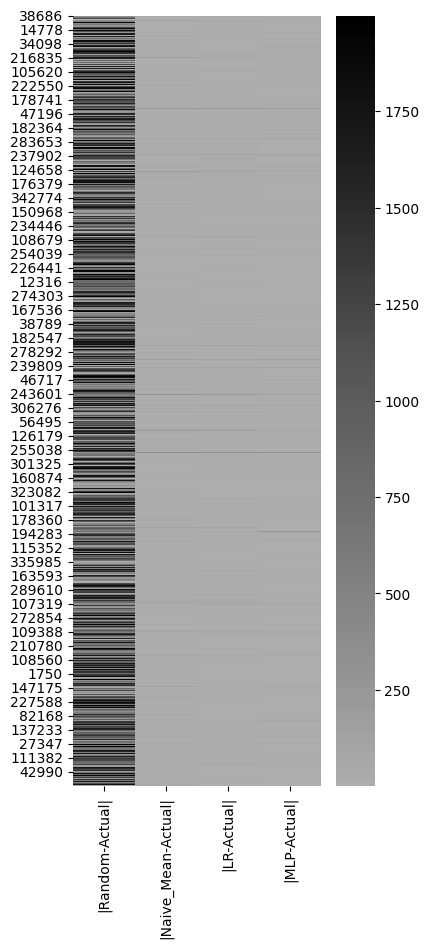

In [17]:
mlp = MLPRegressor(hidden_layer_sizes=5,max_iter=2000)
mlp.fit(X_train, y_train)

result_df['MLP'] = mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(4,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [18]:
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP
ME,-975.645926,-0.073512,-0.049521,-0.729807
RMSE,1133.910258,37.582783,33.89408,31.184361
MAE,976.591618,18.207875,16.22318,14.535408
MAPE,7083.099374,112.909865,89.978524,77.376753


### It's clear that even without proper parameter tuning, our Multilayer Perceptron model is doing a good job compared to other Models.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370412 entries, 0 to 370411
Columns: 206 entries, Unnamed: 0.1 to 199
dtypes: float64(201), int64(5)
memory usage: 582.2 MB


In [9]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression


import statsmodels.api as sm

In [10]:
train_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'train_id', 'item_condition_id', 'price',
       'shipping', '0', '1', '2', '3',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=206)

In [12]:
train_data.drop(columns=[ 'Unnamed: 0.1', 'Unnamed: 0', 'train_id'], inplace=True)

In [13]:
train_data.head()

,item_condition_id,price,shipping,0,1,2,3,4,5,6,...,190,191,192,193,194,195,196,197,198,199
0,2,8.0,1,-0.100559,-0.614330,0.208602,0.571966,-0.131203,0.016526,0.608419,...,-0.075749,0.193744,0.494159,-0.073508,0.494414,-0.169989,0.131777,0.145828,0.024475,-0.127633
1,3,14.0,0,-0.329170,-0.350506,0.272558,0.105843,1.208020,1.528792,-0.091454,...,-1.339325,0.835479,0.271060,0.437964,1.127263,1.099126,-0.569234,-0.982572,-0.126194,-0.116404
2,1,25.0,1,-0.240003,-0.041858,0.145329,0.452647,0.760089,0.097341,0.452785,...,0.418078,0.219362,0.174552,-0.024960,-0.002166,0.013162,-0.374551,-0.620355,0.631266,-0.212377
3,3,25.0,0,-0.101531,-0.345377,-0.117154,-0.361317,-0.764579,0.917608,0.777097,...,-0.010613,0.054686,0.057820,1.474908,0.728149,1.006546,-0.213868,0.185430,-0.457993,-0.727977
4,1,12.0,1,0.820777,-0.600387,-0.174789,-0.790316,0.611780,0.271854,0.250769,...,-0.093859,0.078621,-0.048399,-0.540433,0.852686,0.234550,-0.283534,-0.156189,0.549295,-0.314060


In [ ]:
train_data.to_csv('training_data_for_Model2.csv')

In [14]:
target = train_data['price']
features = train_data.drop(columns=['price'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target,  test_size=0.3, random_state=1)

In [16]:
result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

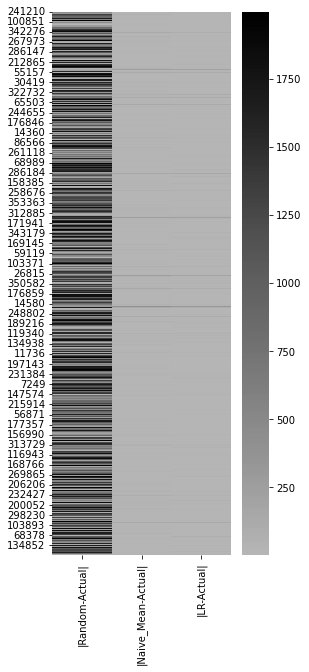

In [17]:
# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

#Method: LR
lr = LinearRegression()
lr.fit(X_train, y_train)
result_df.LR =lr.predict(X_test)


result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)
result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(4,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [18]:


metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,Random,Naive_Mean,LR
ME,-970.063518,0.088932,0.164038
RMSE,1129.060736,39.21263,35.413453
MAE,971.153575,18.41733,16.208542
MAPE,7069.115668,113.406835,89.233811


# MLP

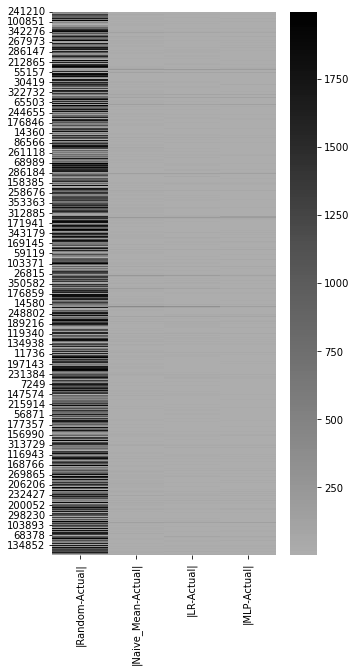

In [19]:
mlp = MLPRegressor(hidden_layer_sizes=5,max_iter=2000)
mlp.fit(X_train, y_train)

result_df['MLP'] = mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(5,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [20]:
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP
ME,-970.063518,0.088932,0.164038,0.663769
RMSE,1129.060736,39.21263,35.413453,31.896952
MAE,971.153575,18.41733,16.208542,14.021372
MAPE,7069.115668,113.406835,89.233811,71.639753


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np


# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, result_df['MLP'])
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, result_df['MLP'])
print("Mean Absolute Error (MAE):", mae)

# R-squared (R²) or Coefficient of Determination
r2 = r2_score(y_test, result_df['MLP'])
print("R-squared (R²):", r2)

# Explained Variance Score
explained_var = explained_variance_score(y_test, result_df['MLP'])
print("Explained Variance Score:", explained_var)


Mean Squared Error (MSE): 972.4643839098574
Root Mean Squared Error (RMSE): 31.18436120734009
Mean Absolute Error (MAE): 14.535408145992694
R-squared (R²): 0.3115102290165468
Explained Variance Score: 0.311887314309401
